In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Data courtesy of https://github.com/YBIFoundation/Dataset/blob/main/Bike%20Prices.csv
bike_data = pd.read_csv('Bike Prices.csv')
bike_data

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


In [26]:
# EDA
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [27]:
bike_data.drop("Ex_Showroom_Price", axis=1, inplace=True)

In [28]:
bike_data["Brand"].value_counts().index.tolist()

['Bajaj',
 'Hero',
 'Honda',
 'Royal',
 'Yamaha',
 'TVS',
 'Suzuki',
 'KTM',
 'Mahindra',
 'Vespa',
 'Kawasaki',
 'Activa',
 'UM',
 'Jawa',
 'Harley',
 'Aprilia',
 'Yo',
 'Benelli',
 'Hyosung',
 'BMW']

In [29]:
bike_data["Model"].value_counts()

Model
Bajaj Pulsar 150             41
Royal Enfield Classic 350    27
Honda Activa [2000-2015]     23
Honda CB Hornet 160R         22
Bajaj Pulsar 180             20
                             ..
Suzuki Gixxer SF Fi           1
Bajaj Pulsar  NS 200          1
Hero Xpulse 200T              1
Yamaha Fazer                  1
TVS Max DLX                   1
Name: count, Length: 279, dtype: int64

In [30]:
# Drop model column, normalize year
bike_data_1 = bike_data.copy()
bike_data_1.drop("Model", axis=1, inplace=True)
bike_data_1["Bike_Age"] = 2020 - bike_data_1["Year"]

In [31]:
bike_data_1.drop("Year", axis=1, inplace=True)

In [32]:
bike_data_1[bike_data_1["Seller_Type"] == "Dealer"]

,Brand,Selling_Price,Seller_Type,Owner,KM_Driven,Bike_Age
242,Hero,38000,Dealer,1st owner,5500,4
457,Bajaj,72000,Dealer,1st owner,7850,3
540,Yamaha,80000,Dealer,1st owner,30000,7
820,Bajaj,50000,Dealer,1st owner,58203,7
835,Hero,15000,Dealer,2nd owner,10000,21
1035,Hero,25000,Dealer,2nd owner,100000,12


In [33]:
bike_data_1.drop(bike_data_1[bike_data_1["Seller_Type"] == "Dealer"].index, inplace=True)

In [34]:
bike_data_1.drop("Seller_Type", axis=1, inplace=True)

In [35]:
bike_data_1["Owner"].value_counts()

Owner
1st owner    920
2nd owner    121
3rd owner     11
4th owner      3
Name: count, dtype: int64

In [36]:
bike_data_1["Owner_No"] = bike_data_1["Owner"].apply(lambda x: 1 if x == "1st owner" else 2 if x == "2nd owner" else 3 if x == "3rd owner" else 4)

In [37]:
bike_data_1["Owner_No"].value_counts()

Owner_No
1    920
2    121
3     11
4      3
Name: count, dtype: int64

In [38]:
bike_data_1.drop("Owner", axis=1, inplace=True)

In [39]:
bike_data_1[bike_data_1['KM_Driven'] >200000]

,Brand,Selling_Price,KM_Driven,Bike_Age,Owner_No
48,Honda,22989,500000,8,1
56,Honda,25000,585659,11,1
93,Activa,17000,500000,10,1
249,Hero,35000,450000,6,1
492,Honda,70000,240000,3,1
521,Honda,31000,213000,8,1
794,Hero,10000,646000,23,1
887,Hero,40000,340000,9,2
915,TVS,15000,880000,11,4
986,Royal,120000,345000,4,1


<Axes: >

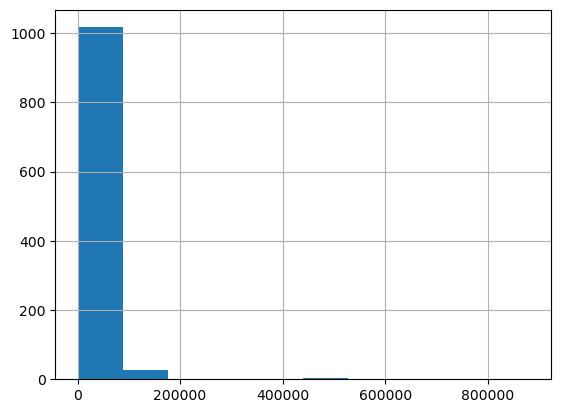

In [40]:
bike_data_1["KM_Driven"].hist()

In [41]:
bike_data_1.drop(bike_data_1[bike_data_1['KM_Driven'] >200000].index, inplace=True)

array([[<Axes: title={'center': 'Selling_Price'}>,
        <Axes: title={'center': 'KM_Driven'}>],
       [<Axes: title={'center': 'Bike_Age'}>,
        <Axes: title={'center': 'Owner_No'}>]], dtype=object)

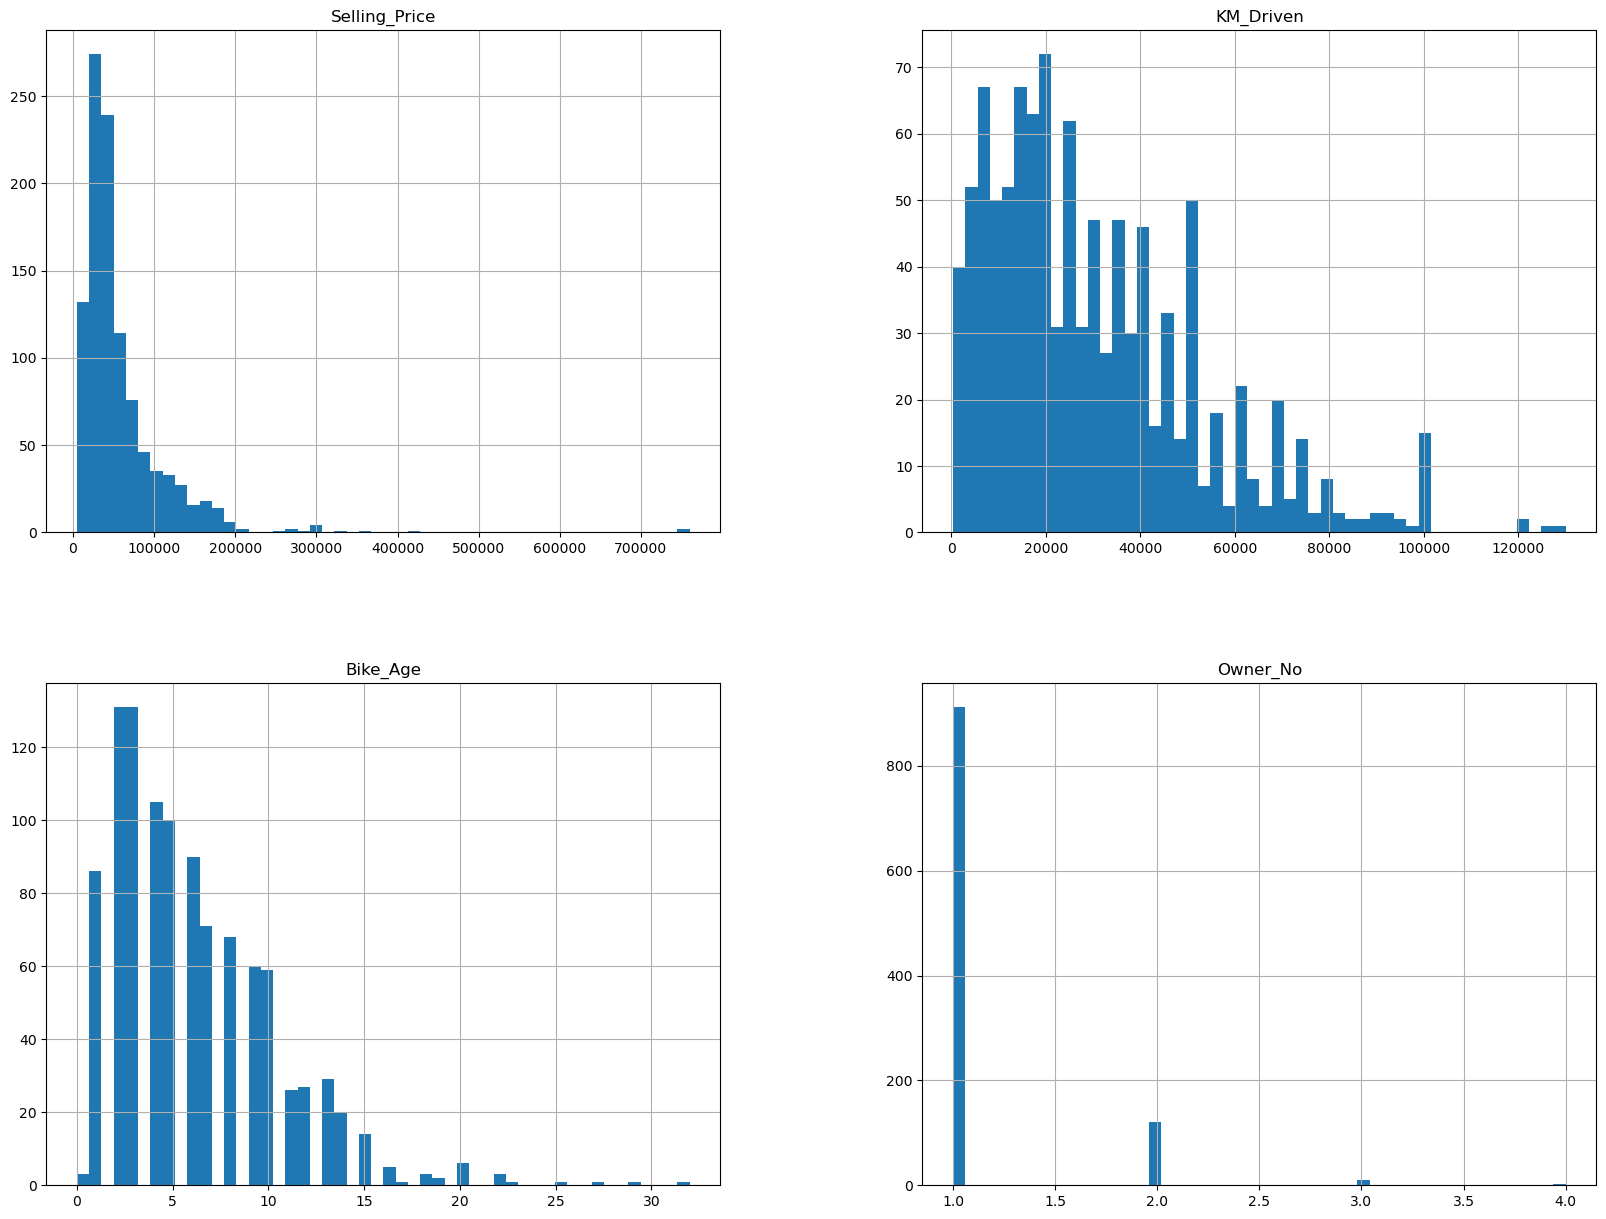

In [42]:
bike_data_1.hist(bins=50, figsize=(20,15))

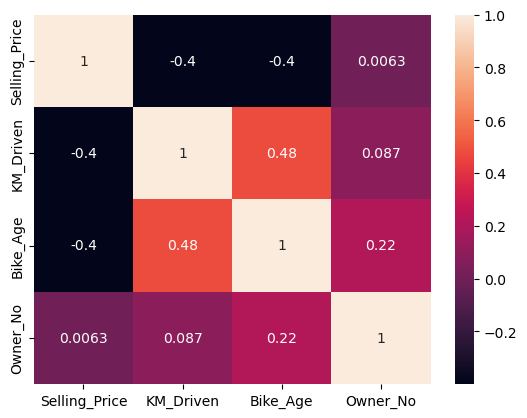

In [44]:
# Visualizing correlation
hmdata = bike_data_1.drop("Brand", axis=1, inplace=False)
sns.heatmap(hmdata.corr(), annot=True)
# Here we can see that Owner_no and Selling_Price are very minorly correlated
# bike_data_1.to_csv("bike_data_cleaned.csv", index=False)

In [45]:
# Apply log transformation to Selling_Price

bike_data_2 = bike_data_1.copy()
bike_data_2["Selling_Price_Log"] = np.log(bike_data_2["Selling_Price"])
bike_data_2.drop("Selling_Price", axis=1, inplace=True)

array([[<Axes: title={'center': 'KM_Driven'}>,
        <Axes: title={'center': 'Bike_Age'}>],
       [<Axes: title={'center': 'Owner_No'}>,
        <Axes: title={'center': 'Selling_Price_Log'}>]], dtype=object)

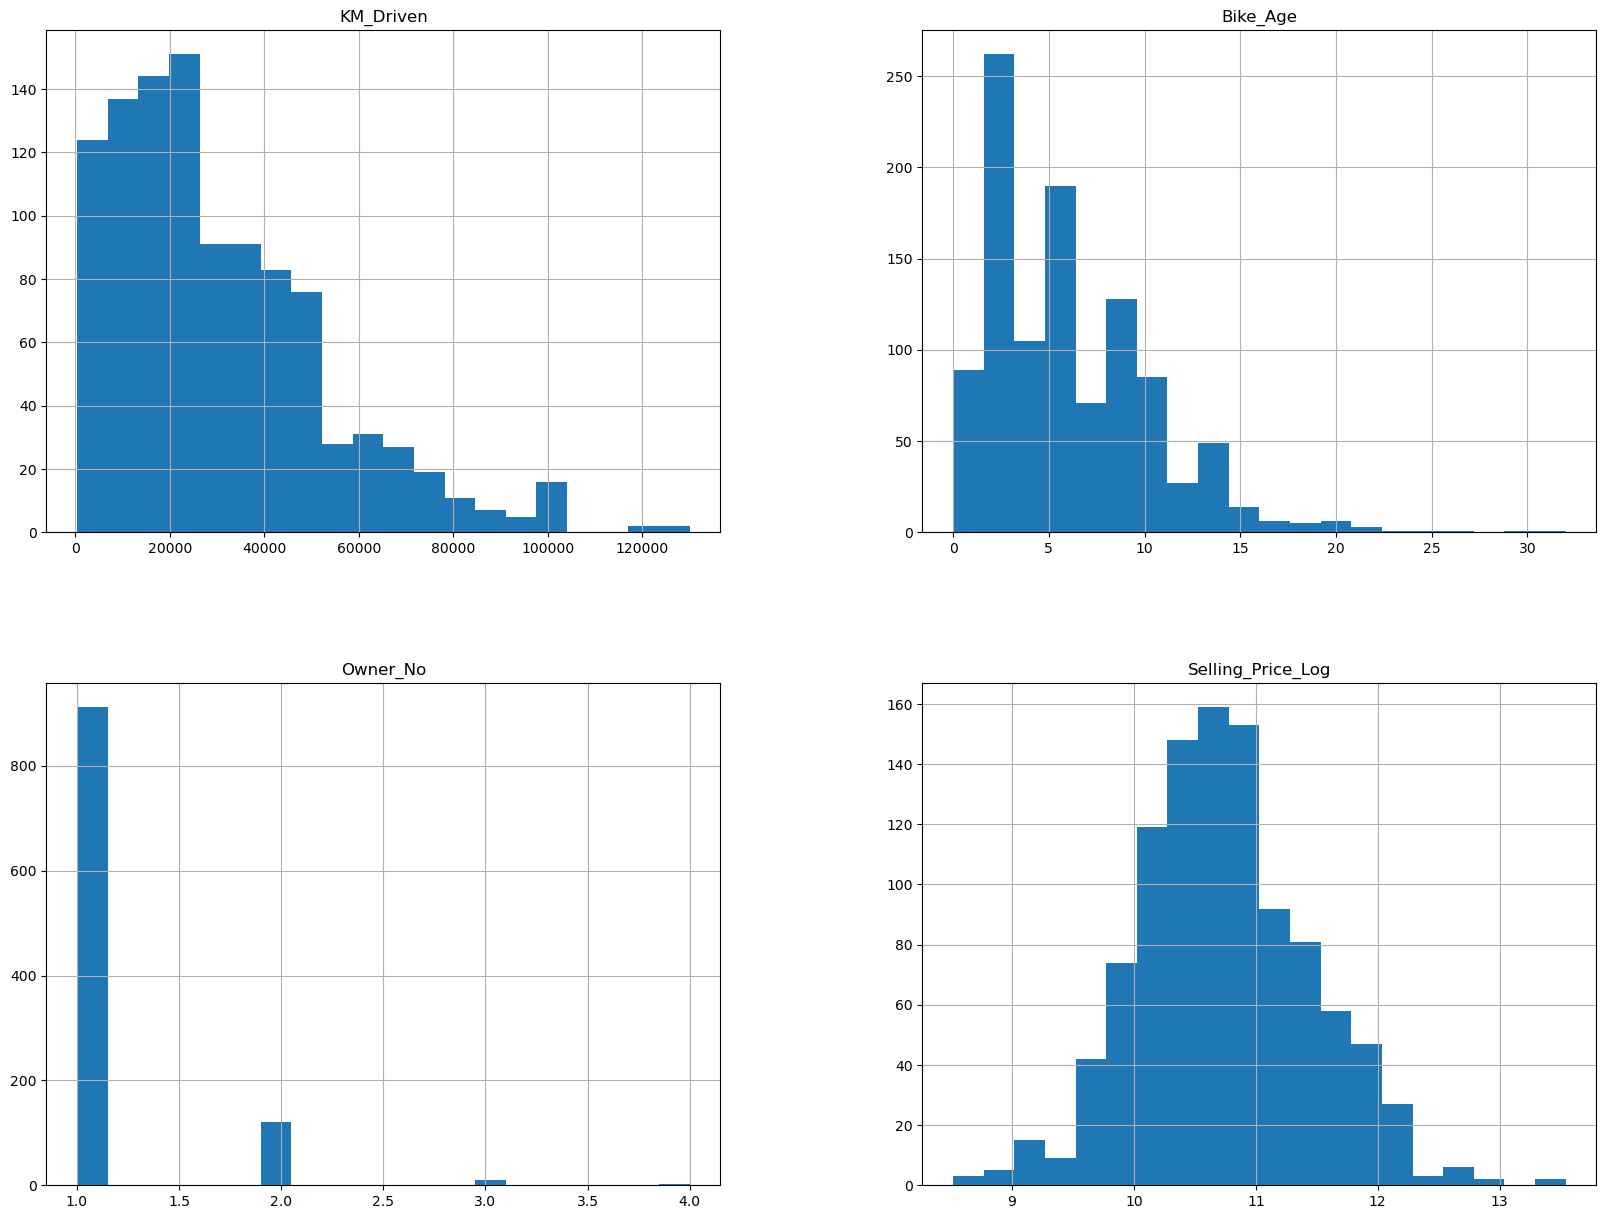

In [46]:
bike_data_2.hist(bins = 20, figsize=(20,15))

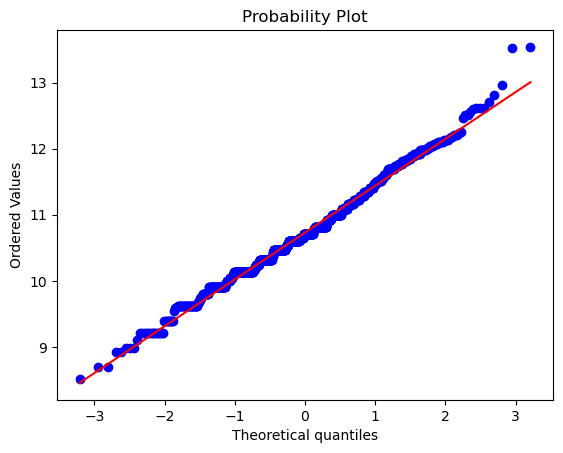

In [47]:
# Q-Q plot for Selling_Price_Log
import scipy.stats as stats
import pylab

stats.probplot(bike_data_2["Selling_Price_Log"], dist="norm", plot=pylab)
plt.show()
# We can safely assume that the data is normally distributed
# Outliers in the upper tail

In [49]:
bike_data_2[bike_data_2["Selling_Price_Log"] > 12]

,Brand,KM_Driven,Bike_Age,Owner_No,Selling_Price_Log
557,Yamaha,1400,1,1,12.043554
569,Royal,5814,2,1,12.100712
575,Royal,500,0,1,12.154779
578,Bajaj,16000,2,1,12.043554
580,Royal,3700,1,1,12.013701
582,Royal,2845,2,1,12.180755
589,KTM,4000,1,1,12.013701
598,UM,1400,1,1,12.043554
600,Royal,5000,5,2,12.128111
601,Royal,3000,2,1,12.072541


In [48]:
# Finding the upper and lower bounds for outliers
a = bike_data_2["Selling_Price_Log"].quantile([0.25, 0.5, 0.75])
IQR = a[0.75] - a[0.25]
LB = a[0.25] - 1.5*IQR
UB = a[0.75] + 1.5*IQR
print(LB, UB)

8.865523691346109 12.530686618842726


In [82]:
# Filtering the data for outliers, based on the calculated bounds
bike_data_2 = bike_data_2[(bike_data_2["Selling_Price_Log"] > LB) & (bike_data_2["Selling_Price_Log"] < UB)]

array([[<Axes: title={'center': 'KM_Driven'}>,
        <Axes: title={'center': 'Bike_Age'}>],
       [<Axes: title={'center': 'Owner_No'}>,
        <Axes: title={'center': 'Selling_Price_Log'}>]], dtype=object)

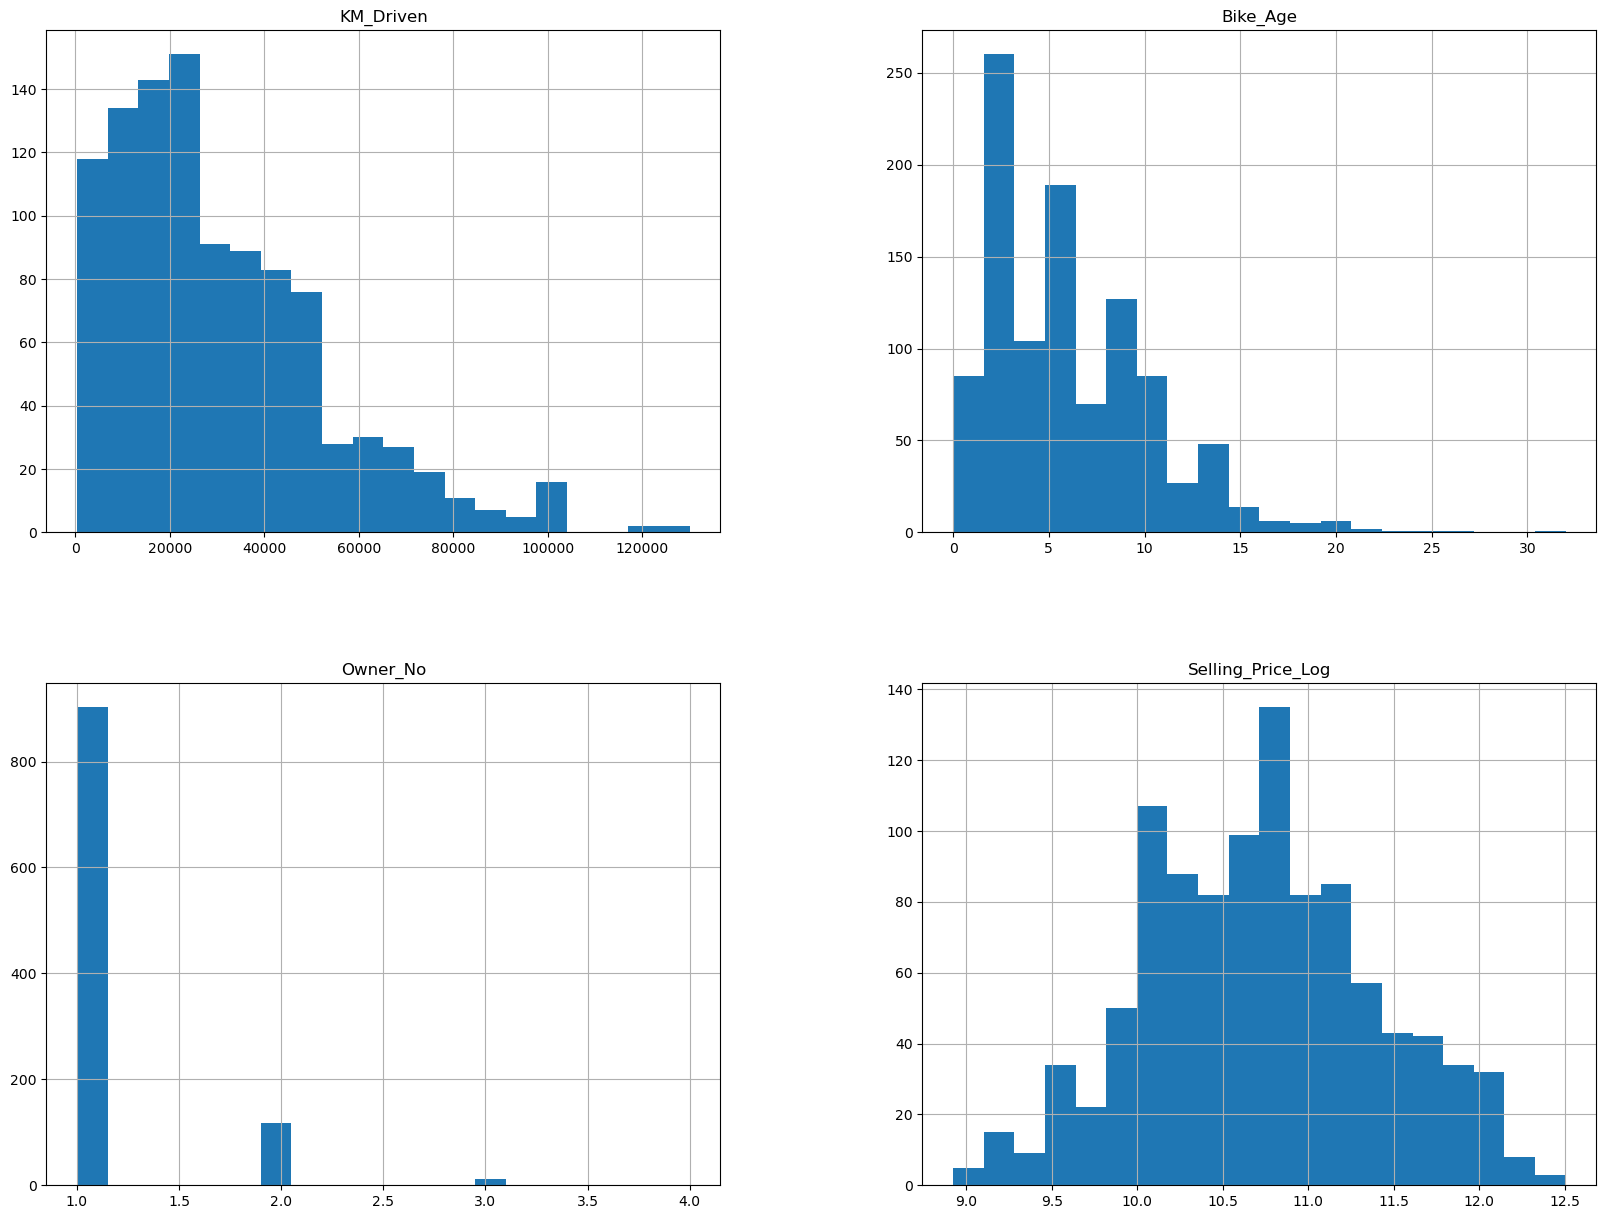

In [86]:
bike_data_2.hist(bins = 20, figsize=(20,15))

In [85]:
bike_data_2

,Brand,KM_Driven,Bike_Age,Owner_No,Selling_Price_Log
0,TVS,8000,3,1,10.308953
1,Bajaj,35000,3,1,9.798127
2,Yo,10000,9,1,9.903488
3,Bajaj,43000,10,1,10.126631
4,Bajaj,35000,8,2,10.126591
...,...,...,...,...,...
1056,Royal,40000,8,1,11.407565
1057,Hero,17000,10,1,9.903488
1058,Bajaj,16000,6,1,11.002100
1059,Hero,50000,11,1,10.596635


In [87]:
bike_data_3 = bike_data_2.copy()
dummies = pd.get_dummies(bike_data_3[["Brand"]], drop_first=True)
bike_data_3 = pd.concat([bike_data_3, dummies], axis=1)
bike_data_3.drop("Brand", axis=1, inplace=True)

In [88]:
bike_data_3.columns

Index(['KM_Driven', 'Bike_Age', 'Owner_No', 'Selling_Price_Log',
       'Brand_Aprilia', 'Brand_Bajaj', 'Brand_Benelli', 'Brand_Hero',
       'Brand_Honda', 'Brand_Hyosung', 'Brand_Jawa', 'Brand_KTM',
       'Brand_Kawasaki', 'Brand_Mahindra', 'Brand_Royal', 'Brand_Suzuki',
       'Brand_TVS', 'Brand_UM', 'Brand_Vespa', 'Brand_Yamaha', 'Brand_Yo'],
      dtype='object')

<Axes: >

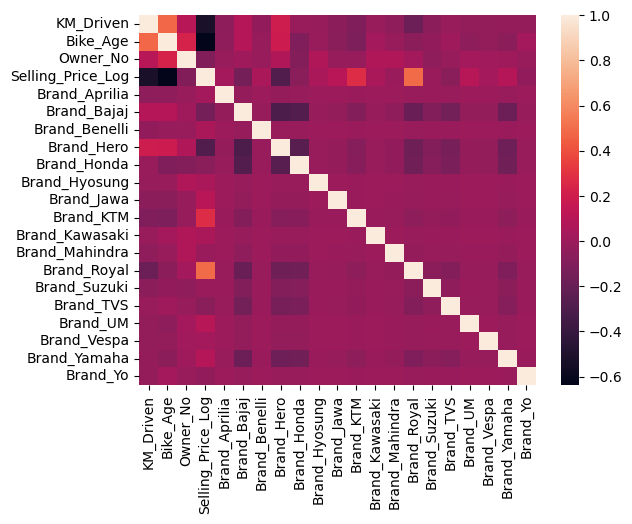

In [105]:
# Build heatmap
sns.heatmap(bike_data_3.corr(), annot=False)
# We can see that some brands influences the selling price more than others


In [111]:
bike_data_3.corr().loc["Selling_Price_Log"].sort_values(ascending=False)

Selling_Price_Log    1.000000
Brand_Royal          0.493747
Brand_KTM            0.276317
Brand_Jawa           0.108661
Brand_UM             0.099677
Brand_Yamaha         0.086117
Brand_Benelli        0.058617
Brand_Hyosung        0.050753
Brand_Kawasaki       0.047191
Brand_Vespa          0.033620
Brand_Aprilia        0.028630
Brand_Suzuki        -0.004737
Brand_Mahindra      -0.005587
Brand_Yo            -0.037633
Brand_Honda         -0.071022
Brand_TVS           -0.072323
Owner_No            -0.101955
Brand_Bajaj         -0.150747
Brand_Hero          -0.297090
KM_Driven           -0.523779
Bike_Age            -0.637086
Name: Selling_Price_Log, dtype: float64

In [112]:
bike_data_3.corr().loc["Selling_Price_Log"].abs().sort_values(ascending=False)

Selling_Price_Log    1.000000
Bike_Age             0.637086
KM_Driven            0.523779
Brand_Royal          0.493747
Brand_Hero           0.297090
Brand_KTM            0.276317
Brand_Bajaj          0.150747
Brand_Jawa           0.108661
Owner_No             0.101955
Brand_UM             0.099677
Brand_Yamaha         0.086117
Brand_TVS            0.072323
Brand_Honda          0.071022
Brand_Benelli        0.058617
Brand_Hyosung        0.050753
Brand_Kawasaki       0.047191
Brand_Yo             0.037633
Brand_Vespa          0.033620
Brand_Aprilia        0.028630
Brand_Mahindra       0.005587
Brand_Suzuki         0.004737
Name: Selling_Price_Log, dtype: float64

In [1]:
# Begin building the model
from sklearn.model_selection import train_test_split
X = bike_data_3.drop("Selling_Price_Log", axis=1)
y = bike_data_3["Selling_Price_Log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NameError: name 'bike_data_3' is not defined

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.metrics import r2_score, accuracy_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_pred), "after exp transformation:", np.exp(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred), "after exp transformation:", np.exp(mean_absolute_error(y_test, y_pred)))
print(median_absolute_error(y_test, y_pred), "after exp transformation:", np.exp(median_absolute_error(y_test, y_pred)))


0.1660150419130282 after exp transformation: 1.1805908599347539
0.2826147822407842 after exp transformation: 1.3265940357942094
0.1969381126988452 after exp transformation: 1.2176686801456866


In [100]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=10, scoring="neg_mean_squared_error")
print(np.sqrt(-scores).mean())
print(scores)
print(f"positive and exp transformed scores: \n", np.exp(-scores))

0.38886235520431495
[-0.23061319 -0.12222639 -0.07070972 -0.10275684 -0.1051943  -0.35225709
 -0.13754963 -0.15274972 -0.12656223 -0.19097649]
positive and exp transformed scores: 
 [1.25937201 1.13000989 1.07326964 1.1082219  1.11092644 1.42227413
 1.14745865 1.16503335 1.13492007 1.21043099]


In [128]:
print(lr.intercept_)
print(lr.coef_)

10.727354871344247
[-3.73209116e-06 -8.62325024e-02 -3.96359173e-02  6.13983226e-01
  5.55675063e-01  1.56140542e+00  4.59115111e-01  4.84736330e-01
  1.57145653e+00  1.42472613e+00  1.50546604e+00  2.02868492e+00
  5.19986692e-01  1.53045424e+00  5.39232006e-01  4.88922839e-01
  1.52829401e+00  7.76448597e-01  7.01529804e-01  0.00000000e+00]


In [103]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_squared_error(y_test, y_pred), "after exp transformation:", np.exp(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred), "after exp transformation:", np.exp(mean_absolute_error(y_test, y_pred)))

0.16160146290474475 after exp transformation: 1.1753917107656022
0.29747288592667237 after exp transformation: 1.3464518670631778


<Axes: xlabel='Actual', ylabel='Predicted'>

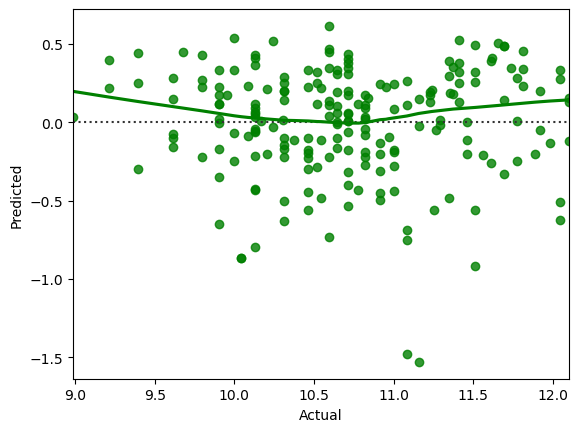

In [122]:
test_pred = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
test_pred.reset_index(drop=True, inplace=True)
test_pred.columns = ["Actual", "Predicted"]
sns.residplot(x="Actual", y="Predicted", data=test_pred, lowess=True, color="g")

In [123]:
original = np.exp(test_pred)

In [173]:
original

,Actual,Predicted
0,32000.0,29800.108883
1,16000.0,31864.749586
2,70000.0,67600.960185
3,45000.0,24944.860285
4,180000.0,130624.019241
...,...,...
202,21000.0,29393.386091
203,20000.0,26758.290650
204,30000.0,36821.706851
205,37000.0,27779.264459
